In [47]:
# import library
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

In [48]:
# create dataframe from csv file
data = pd.read_csv('Dataset Beras Harian Wonosobo.csv', index_col='Tanggal', parse_dates=True)
data.tail(30)

,Premium,Medium
Tanggal,,
16/01/2025,14000,13000
17/01/2025,14000,13000
18/01/2025,14000,13000
19/01/2025,14000,13000
20/01/2025,14000,13000
21/01/2025,14000,13000
22/01/2025,14000,13000
23/01/2025,14000,13000
24/01/2025,14000,13000


<Axes: xlabel='Tanggal'>

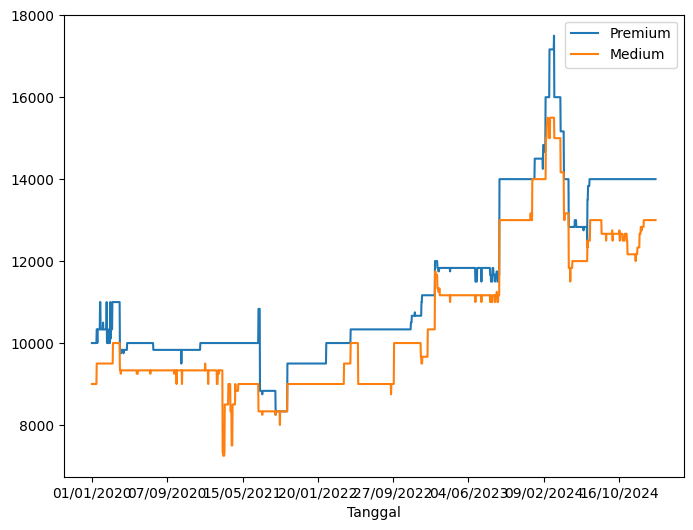

In [49]:
# plot data
data.plot()

In [50]:
# Scaling Data menggunakan minmax scaller
min_max_scaler = MinMaxScaler(feature_range=(1, 2))
dataset = min_max_scaler.fit_transform(
    data['Premium'].values.reshape(-1, 1)
    )

In [51]:
data_awal = data['Premium'].values.reshape(-1)
data_minmax = dataset.reshape(-1)
# data_predict
new_df = {
    "data asli" : data_awal,
    "min-max": data_minmax
}

dataframe = pd.DataFrame(new_df)
dataframe.sample(10)
# data_minmax

,data asli,min-max
1405,14000,1.621622
211,9833,1.171135
455,10000,1.189189
1721,14000,1.621622
1667,14000,1.621622
871,10333,1.225189
1670,14000,1.621622
1611,12833,1.495459
780,10000,1.189189
771,9500,1.135135


In [52]:
# membuat fungsi window dataset
def windowed_dataset(dataset, window_size=15):
    dataX, dataY = [], []
    for i in range(len(dataset)-window_size-1):
        a = dataset[i:(i+window_size), 0]
        dataX.append(a)
        dataY.append(dataset[i + window_size, 0])
    return np.array(dataX), np.array(dataY)

In [53]:
# split data menjadi data train dan data validasi
train_size = int(len(dataset) * 0.8)
validation_size = len(dataset) - train_size
train, validation = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(validation))

1497 375


In [54]:
# Parameters
window_size = 60

# membuat window data train dan validation
x_train, y_train = windowed_dataset(train, window_size)
x_validation, y_validation = windowed_dataset(validation, window_size)
x_train[0]


array([1.18918919, 1.18918919, 1.18918919, 1.18918919, 1.18918919,
       1.18918919, 1.18918919, 1.18918919, 1.18918919, 1.18918919,
       1.18918919, 1.18918919, 1.18918919, 1.18918919, 1.18918919,
       1.18918919, 1.22518919, 1.22518919, 1.18918919, 1.22518919,
       1.22518919, 1.22518919, 1.22518919, 1.22518919, 1.22518919,
       1.22518919, 1.22518919, 1.2972973 , 1.2972973 , 1.22518919,
       1.22518919, 1.22518919, 1.22518919, 1.22518919, 1.22518919,
       1.22518919, 1.22518919, 1.24324324, 1.22518919, 1.22518919,
       1.22518919, 1.22518919, 1.22518919, 1.22518919, 1.22518919,
       1.22518919, 1.22518919, 1.22518919, 1.22518919, 1.2972973 ,
       1.18918919, 1.18918919, 1.18918919, 1.18918919, 1.18918919,
       1.22518919, 1.18918919, 1.18918919, 1.18918919, 1.18918919])

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

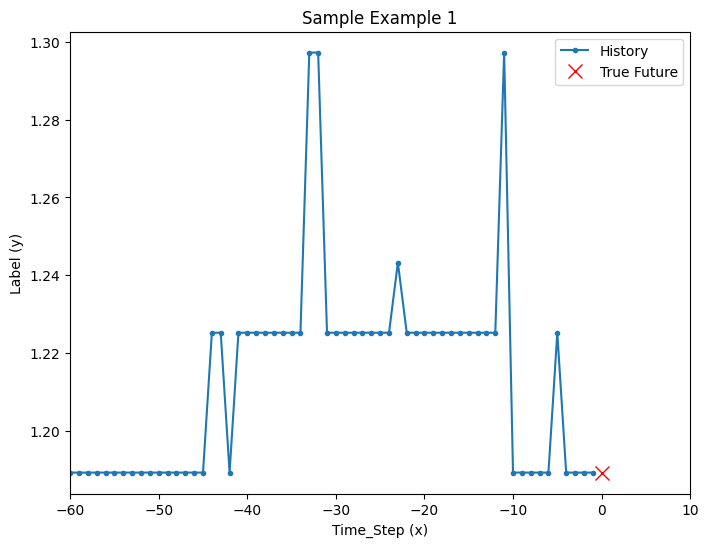

In [55]:
### fucntion to create time steps
def create_time_steps(length):
  return list(range(-length,0))

### function to plot time series data

def plot_time_series(plot_data, delta , title):
  labels = ["History" , 'True Future' , 'Model Predcited']
  marker = ['.-' , 'rx' , 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])

  if delta:
    future = delta
  else:
    future = 0
  plt.title(title)
  for i , x in enumerate(plot_data):
    if i :
      plt.plot(future , plot_data[i] , marker[i], markersize = 10 , label = labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label = labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5) *2])

  plt.xlabel('Time_Step (x)')
  plt.ylabel('Label (y)')

  return plt

plot_time_series([x_train[0] , y_train[0]] , 0 , 'Sample Example 1')

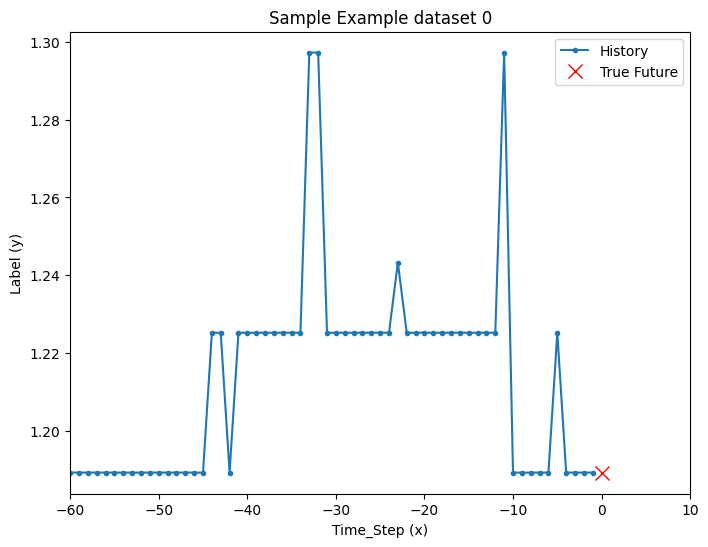

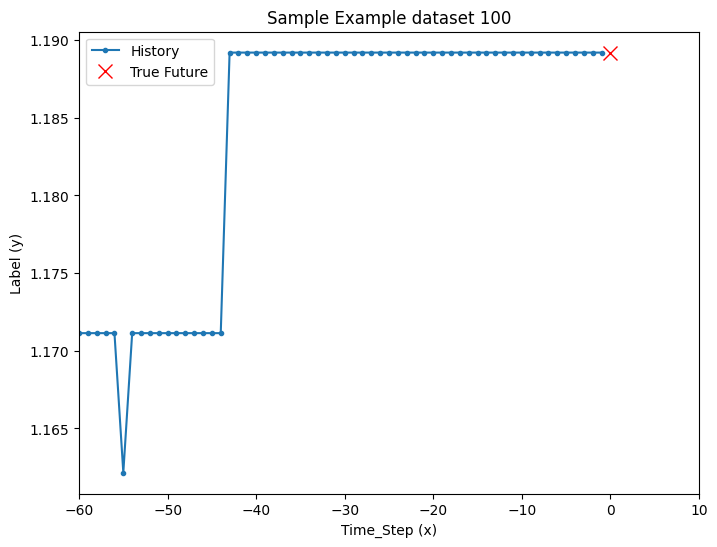

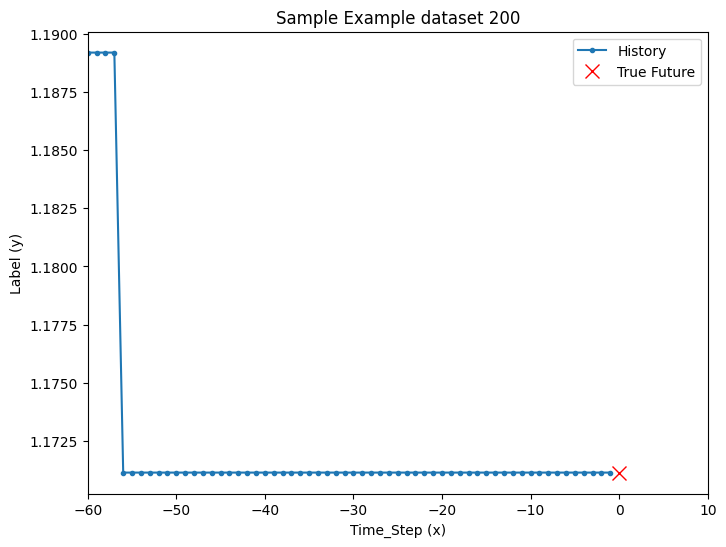

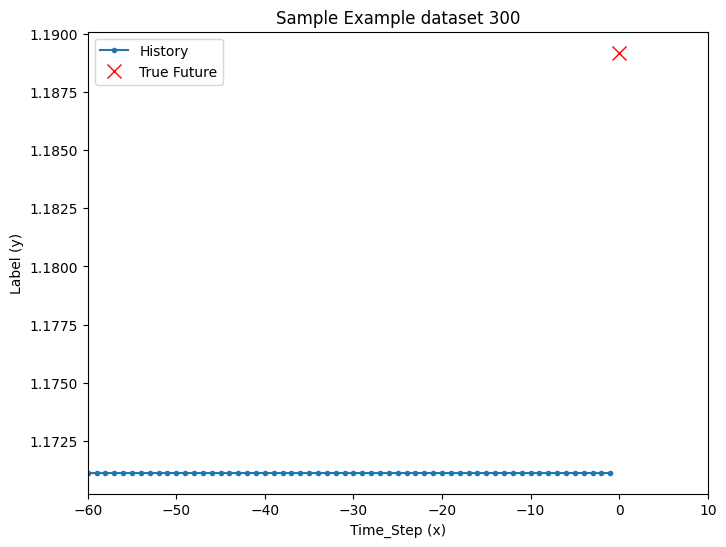

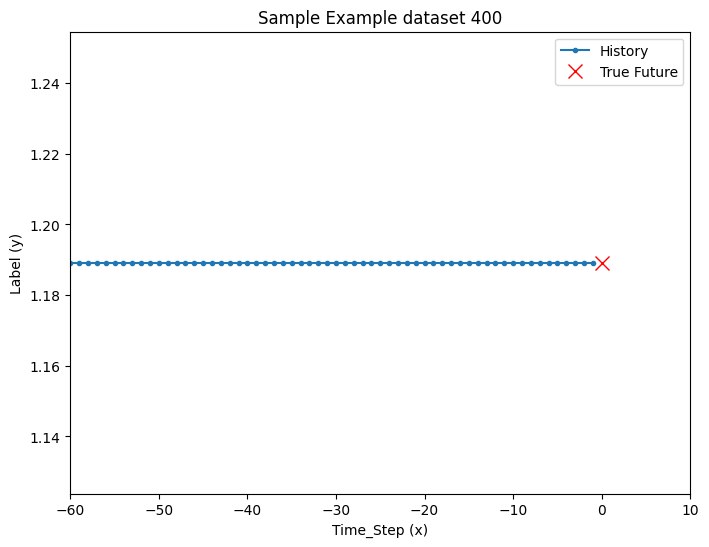

In [56]:
n_data = [0, 100, 200, 300, 400]
for i in n_data:
    plot = plot_time_series([x_train[i] , y_train[i]] , 0 , f'Sample Example dataset {i}')
    plot.show()

In [57]:
value_train = {}
for i, j in enumerate(x_train[0]):
    value_train[f"x{i+1}"] = [j]

value_train['y'] = y_validation[0]

df_windows = pd.DataFrame(value_train)
df_windows.sample(20, replace=True)


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x52,x53,x54,x55,x56,x57,x58,x59,x60,y
0,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,...,1.189189,1.189189,1.189189,1.189189,1.225189,1.189189,1.189189,1.189189,1.189189,1.747676
0,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,...,1.189189,1.189189,1.189189,1.189189,1.225189,1.189189,1.189189,1.189189,1.189189,1.747676
0,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,...,1.189189,1.189189,1.189189,1.189189,1.225189,1.189189,1.189189,1.189189,1.189189,1.747676
0,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,...,1.189189,1.189189,1.189189,1.189189,1.225189,1.189189,1.189189,1.189189,1.189189,1.747676
0,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,...,1.189189,1.189189,1.189189,1.189189,1.225189,1.189189,1.189189,1.189189,1.189189,1.747676
0,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,...,1.189189,1.189189,1.189189,1.189189,1.225189,1.189189,1.189189,1.189189,1.189189,1.747676
0,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,...,1.189189,1.189189,1.189189,1.189189,1.225189,1.189189,1.189189,1.189189,1.189189,1.747676
0,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,...,1.189189,1.189189,1.189189,1.189189,1.225189,1.189189,1.189189,1.189189,1.189189,1.747676
0,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,...,1.189189,1.189189,1.189189,1.189189,1.225189,1.189189,1.189189,1.189189,1.189189,1.747676
0,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,1.189189,...,1.189189,1.189189,1.189189,1.189189,1.225189,1.189189,1.189189,1.189189,1.189189,1.747676


In [58]:
# cek dimensi data yang sudah dibuat menjadi window dataset
print(f"x train : {x_train.shape}")
print(f"y train : {y_train.shape}")
print(f"x validation : {x_validation.shape}")
print(f"y validation : {y_validation.shape}")

x train : (1436, 60)
y train : (1436,)
x validation : (314, 60)
y validation : (314,)


In [59]:
# reshape data
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_validation = np.reshape(x_validation, (x_validation.shape[0], 1, x_validation.shape[1]))

In [60]:
# cek dimensi data yang sudah dibuat menjadi window dataset
print(f"x train : {x_train.shape}")
print(f"y train : {y_train.shape}")
print(f"x validation : {x_validation.shape}")
print(f"y validation : {y_validation.shape}")

x train : (1436, 1, 60)
y train : (1436,)
x validation : (314, 1, 60)
y validation : (314,)


In [61]:
## prepare tensorflow dataset
batch_size = 256
buffer_size = 10000

train_dataset = tf.data.Dataset.from_tensor_slices((x_train , y_train))
train_dataset = train_dataset.cache().shuffle(buffer_size).batch(batch_size).repeat()

val_dataset = tf.data.Dataset.from_tensor_slices((x_validation , y_validation))
val_dataset = val_dataset.cache().shuffle(buffer_size).batch(batch_size).repeat()

print(train_dataset)
print(val_dataset)

<_RepeatDataset element_spec=(TensorSpec(shape=(None, 1, 60), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>
<_RepeatDataset element_spec=(TensorSpec(shape=(None, 1, 60), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>


In [62]:
# membuat model lstm menggunakan keras
model = tf.keras.models.Sequential()
model.add(
    tf.keras.layers.LSTM(20, input_shape=(1, window_size))),
model.add(tf.keras.layers.Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [63]:
# set loss dan optimizer training data
optimizer = 'adam'

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

# train model
steps = 200
EPOCHS = 50
history = model.fit(train_dataset , epochs = EPOCHS, steps_per_epoch = steps ,
               validation_data = val_dataset, validation_steps = 50)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1707 - mae: 0.2460 - val_loss: 0.0141 - val_mae: 0.1093
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0034 - mae: 0.0407 - val_loss: 0.0027 - val_mae: 0.0423
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0012 - mae: 0.0203 - val_loss: 0.0013 - val_mae: 0.0193
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.0712e-04 - mae: 0.0155 - val_loss: 6.1602e-04 - val_mae: 0.0129
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.4903e-04 - mae: 0.0135 - val_loss: 5.5608e-04 - val_mae: 0.0177
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.5720e-04 - mae: 0.0124 - val_loss: 6.6081e-04 - val_mae: 0.0209
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.0770e-04 - mae: 0.0118 - val_loss: 3.3313e-04 - val_mae: 0.0095
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.6559e-04 - mae: 0.0115 - val_loss: 6.3445e-04 - val_mae: 0.0199
Epoch 9/50
200/2

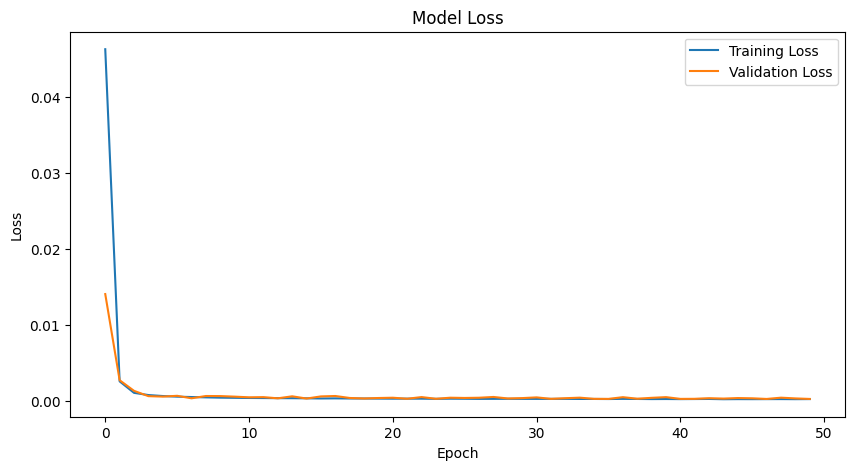

In [64]:
# Plot loss and accuracy selama training
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [65]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_validation)

# invert predictions
trainPredict = min_max_scaler.inverse_transform(trainPredict)
trainY = min_max_scaler.inverse_transform([y_train])
testPredict = min_max_scaler.inverse_transform(testPredict)
testY = min_max_scaler.inverse_transform([y_validation])

# calculate root mean squared error
trainScore = sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Train Score: 126.60 RMSE
Test Score: 145.79 RMSE


In [66]:
def calculate_mape(actual, predicted) -> float:
  mape = np.mean(np.abs((actual - predicted)/actual))*100
  return mape

In [67]:
# calculate root mean squared error
trainScore = calculate_mape(trainY[0], trainPredict[:,0])
print('Train Score: %.2f MAPE' % (trainScore))
testScore = calculate_mape(testY[0], testPredict[:,0])
print('Test Score: %.2f MAPE' % (testScore))

Train Score: 0.40 MAPE
Test Score: 0.49 MAPE


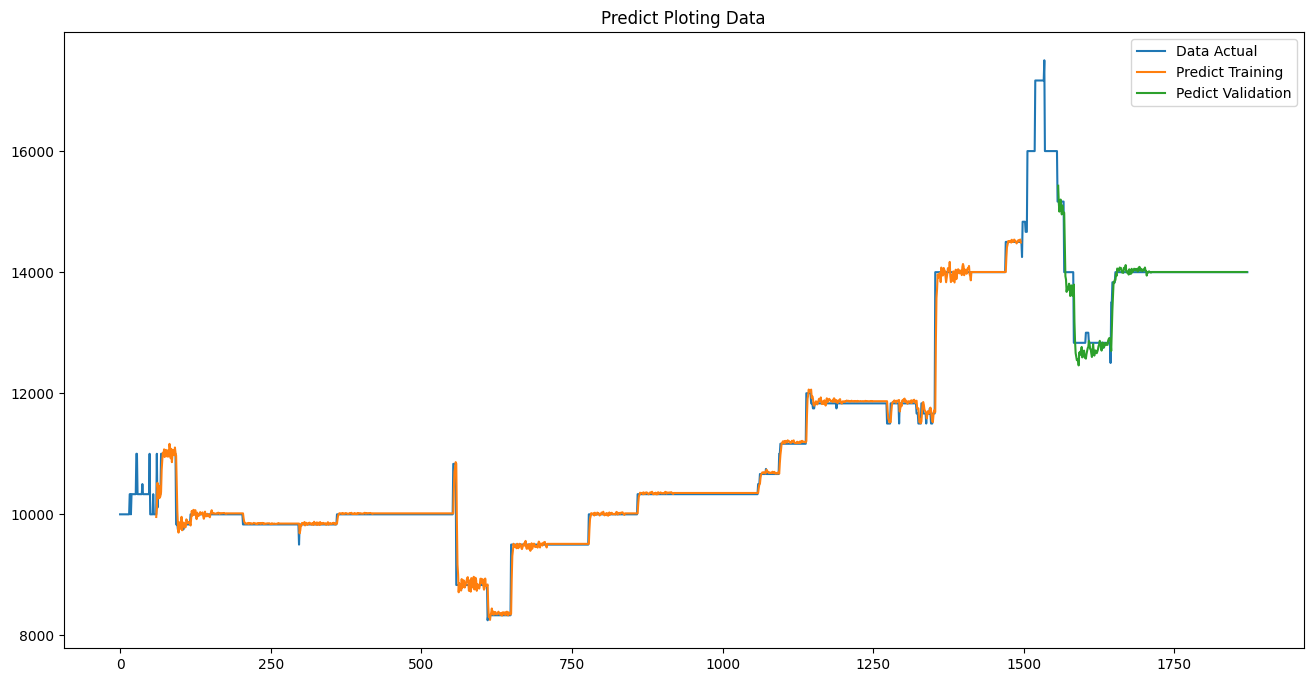

In [68]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[window_size:len(trainPredict)+window_size, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(window_size*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.figure(figsize=(16,8))
plt.plot(min_max_scaler.inverse_transform(dataset), label='Data Actual')
plt.plot(trainPredictPlot, label='Predict Training')
plt.plot(testPredictPlot, label='Pedict Validation')
plt.title('Predict Ploting Data')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


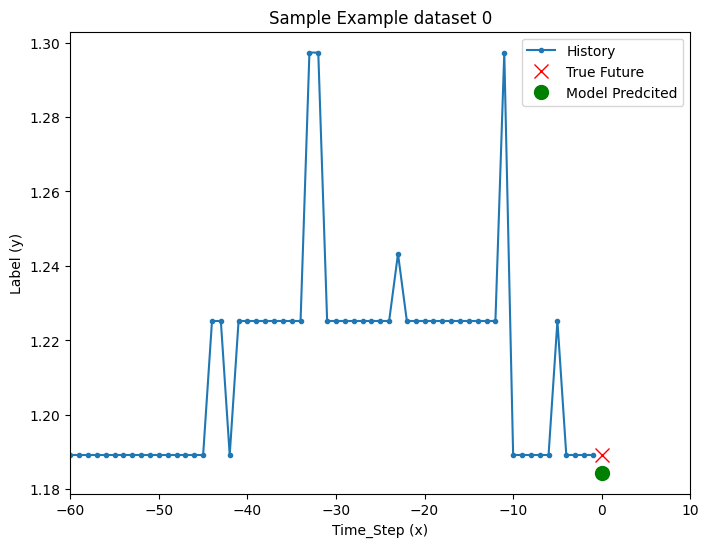

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


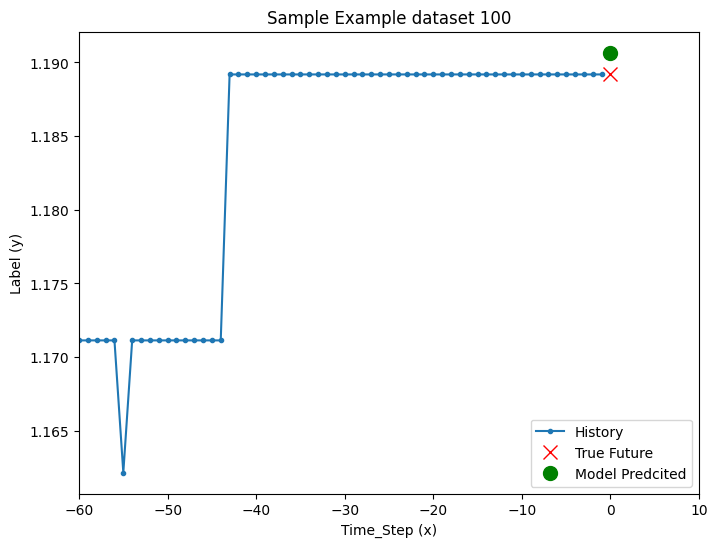

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


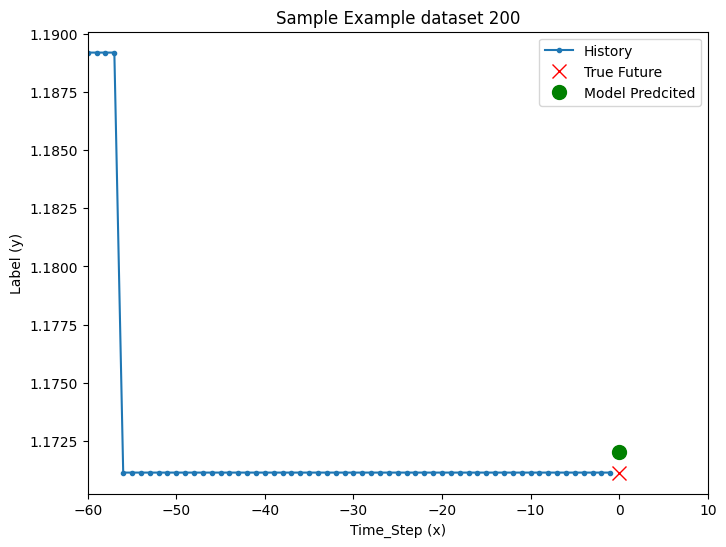

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


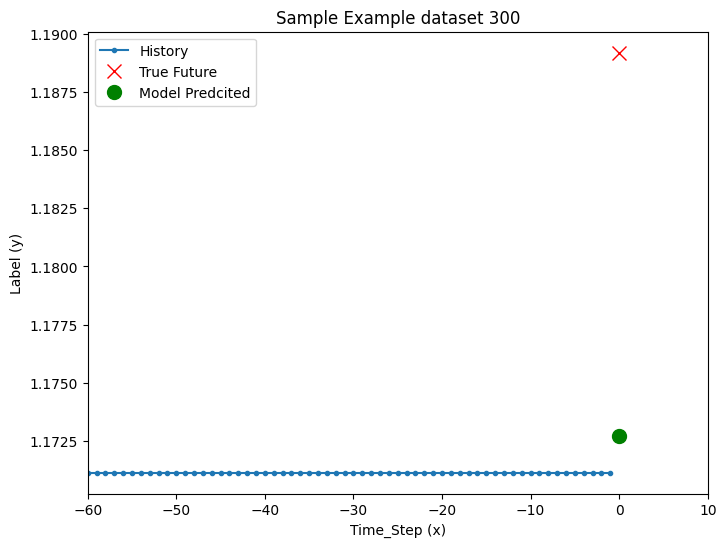

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


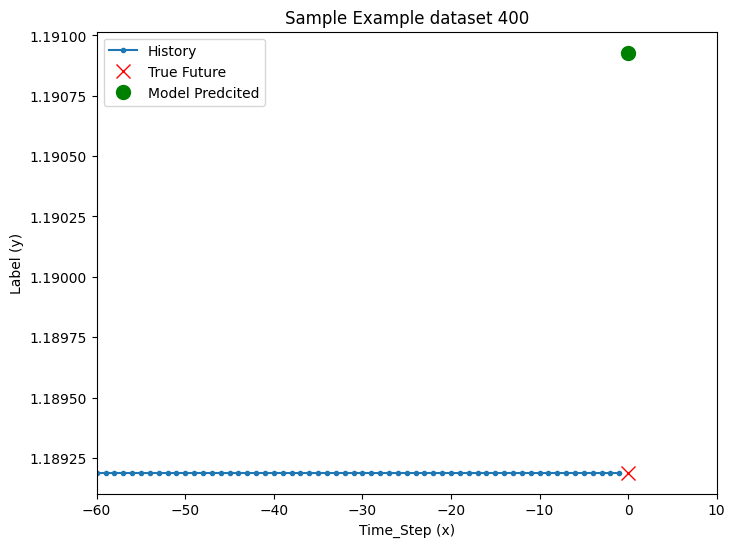

In [69]:
n_data = [0, 100, 200, 300, 400]
for i in n_data:

    dapapred = np.reshape(x_train[i], (x_train[i].shape[0], 1, x_train[i].shape[1]))

    plot = plot_time_series([x_train[i].reshape(-1) , y_train[i], model.predict(dapapred)] , 0 , f'Sample Example dataset {i}')
    plot.show()

In [70]:
data_awal_predict = dataset[-20:]
data_awal_predict_reshape = np.reshape(data_awal_predict, (data_awal_predict.shape[1], 1, data_awal_predict.shape[0]))
data_awal_predict_reshape.shape

(1, 1, 20)

In [71]:
data_awal = data[window_size:500+window_size]
data_predict = trainPredict[:500]

# data_predict
new_df = {
    "tanggal" : data_awal.index,
    "data aktual" : data_awal['Premium'].values,
    "data prediksi": data_predict.reshape(-1)
}

dataframe = pd.DataFrame(new_df)
dataframe.sample(20)

,tanggal,data aktual,data prediksi
210,27/09/2020,9833,9847.518555
26,27/03/2020,11000,10861.808594
203,20/09/2020,9833,9855.777344
40,10/04/2020,9833,9765.775391
306,01/01/2021,10000,10015.365234
169,17/08/2020,9833,9853.013672
139,18/07/2020,10000,10016.090820
483,27/06/2021,10000,10016.090820
191,08/09/2020,9833,9841.615234
6,07/03/2020,10333,10275.213867


In [72]:
# Ubah list menjadi NumPy array
harga_asli = np.array([11500, 11500, 11500, 12000, 12000, 14000])
harga_prediksi = np.array([11500, 11500, 11500, 12000, 12000, 14000])

# Gunakan print() untuk menampilkan hasil dari fungsi
print(calculate_mape(harga_asli, harga_prediksi))

0.0
